In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Load image datasets

In [2]:
TRAIN_DIR = '../datasets/CIFAR-10-images/train/'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']


## Load image datasets to TRAIN_DATA array

In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({
            'image': img_arr,
            'class': class_num
        })
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:00<00:00, 6981.80it/s]

50000


## Suffle the data and plot datasets

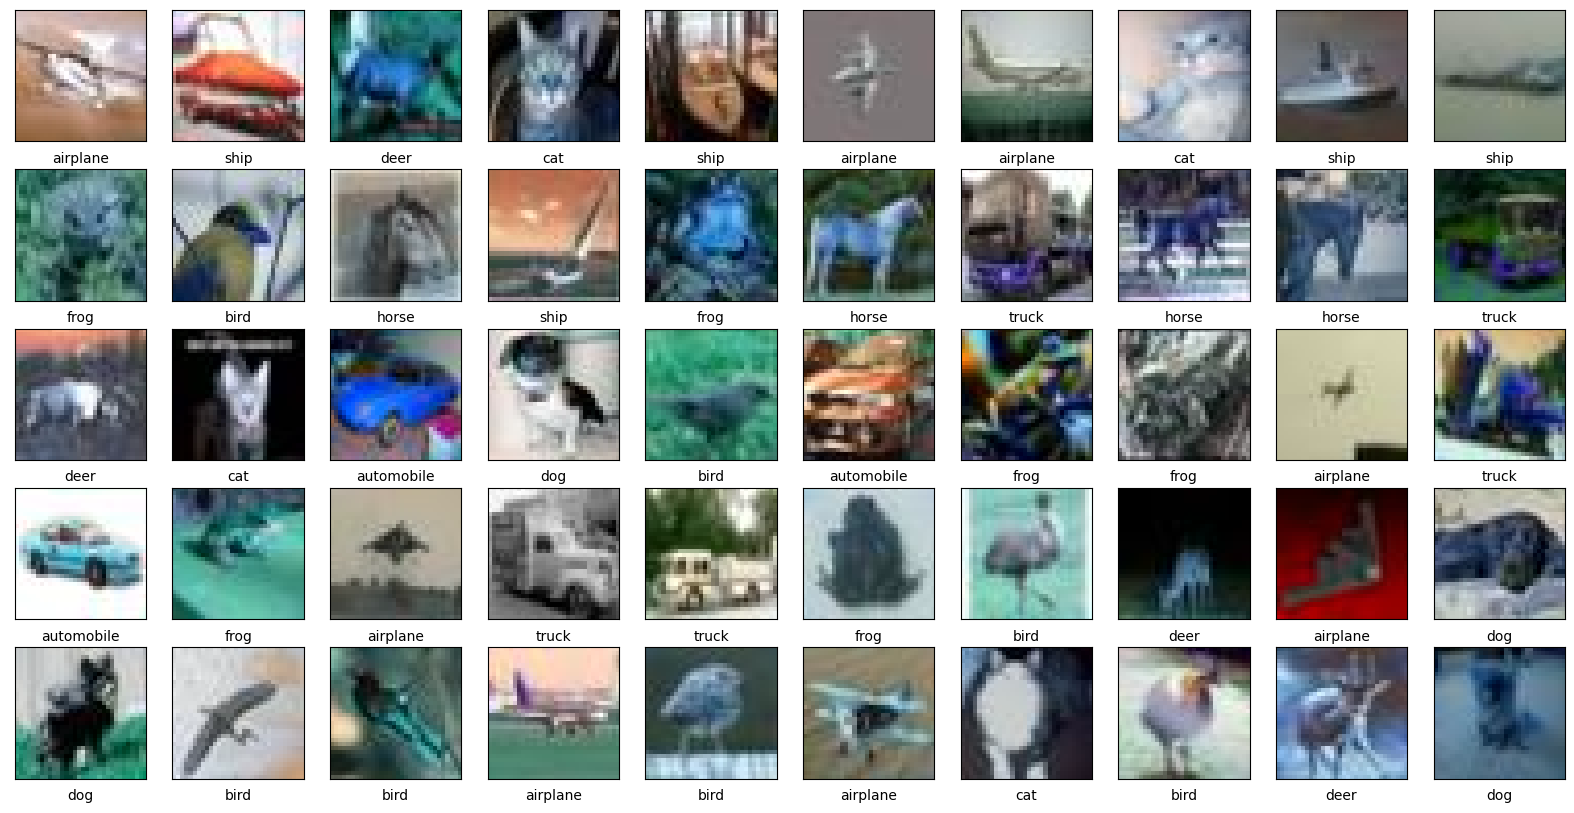

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

# Using Dataset folding and define train and test data split function

In [5]:
# folding data
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

def train_test_split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test

# Define KNN Class 
-  K = number of neighbors

- fit = function that accept X (observed data/Features), y (target data/result)

- predict = function that accepts X_test is the test datasets, l_function = "l2" and "l1"

- accurecy = check the how many actually prediction it can predict [0-1]



In [6]:
class KNeighborClassifer:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)
    
    def predict(self, X_test, l_func = "l2"):
        y_predtion = [] 
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion
        

## Approch to find best k

- X is the training data
- y is the training labels
- l1_accuracies, stored l1_accurecy score in [k]=l1_accurecy_score
- l2_accuracies, stored l2_accurecy score in [k]=l1_accurecy_score

### Taking first 5000 images for consideration

- k neighbours value starts from 1 - 20

- plot the accuracy l1 vs l2 in graph


In [7]:

X = np.array([i['image'] for i in TRAIN_DATA[:5000]])
y = np.array([i['class'] for i in TRAIN_DATA[:5000]])

l1_accuracies = {}
l2_accuracies = {}

k_neighbors = np.arange(1, 20)

for k in tqdm(k_neighbors):
    knn = KNeighborClassifer(k)
    
    X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")

   
    l1_accuracies[k] = knn.accuracy(y_test, y_pred_l1)
    l2_accuracies[k] = knn.accuracy(y_test, y_pred_l2)

    print(f"for k = {k} l1 accuracy is {l1_accuracies[k]} and l2 accuracy is {l2_accuracies[k]}")



    


  5%|▌         | 1/19 [00:41<12:33, 41.88s/it]

for k = 1 l1 accuracy is 0.199 and l2 accuracy is 0.194


 11%|█         | 2/19 [01:23<11:49, 41.73s/it]

for k = 2 l1 accuracy is 0.218 and l2 accuracy is 0.193


 16%|█▌        | 3/19 [02:05<11:06, 41.66s/it]

for k = 3 l1 accuracy is 0.22 and l2 accuracy is 0.203


 21%|██        | 4/19 [08:02<41:32, 166.14s/it]

for k = 4 l1 accuracy is 0.212 and l2 accuracy is 0.194


 26%|██▋       | 5/19 [08:43<28:17, 121.26s/it]

for k = 5 l1 accuracy is 0.214 and l2 accuracy is 0.185


 32%|███▏      | 6/19 [09:25<20:24, 94.17s/it] 

for k = 6 l1 accuracy is 0.201 and l2 accuracy is 0.189


 37%|███▋      | 7/19 [10:07<15:24, 77.02s/it]

for k = 7 l1 accuracy is 0.203 and l2 accuracy is 0.192


 42%|████▏     | 8/19 [10:48<12:02, 65.70s/it]

for k = 8 l1 accuracy is 0.204 and l2 accuracy is 0.203


 47%|████▋     | 9/19 [11:30<09:42, 58.26s/it]

for k = 9 l1 accuracy is 0.191 and l2 accuracy is 0.215


 53%|█████▎    | 10/19 [12:12<07:58, 53.13s/it]

for k = 10 l1 accuracy is 0.199 and l2 accuracy is 0.204


 58%|█████▊    | 11/19 [12:53<06:36, 49.58s/it]

for k = 11 l1 accuracy is 0.194 and l2 accuracy is 0.208


 63%|██████▎   | 12/19 [13:36<05:32, 47.46s/it]

for k = 12 l1 accuracy is 0.198 and l2 accuracy is 0.212


 68%|██████▊   | 13/19 [14:17<04:33, 45.64s/it]

for k = 13 l1 accuracy is 0.202 and l2 accuracy is 0.208


 74%|███████▎  | 14/19 [14:59<03:41, 44.39s/it]

for k = 14 l1 accuracy is 0.202 and l2 accuracy is 0.217


 79%|███████▉  | 15/19 [15:40<02:54, 43.53s/it]

for k = 15 l1 accuracy is 0.199 and l2 accuracy is 0.206


 84%|████████▍ | 16/19 [16:22<02:08, 42.91s/it]

for k = 16 l1 accuracy is 0.206 and l2 accuracy is 0.199


 89%|████████▉ | 17/19 [17:03<01:24, 42.50s/it]

for k = 17 l1 accuracy is 0.216 and l2 accuracy is 0.196


 95%|█████████▍| 18/19 [17:45<00:42, 42.23s/it]

for k = 18 l1 accuracy is 0.215 and l2 accuracy is 0.2


100%|██████████| 19/19 [18:26<00:00, 58.25s/it]

for k = 19 l1 accuracy is 0.216 and l2 accuracy is 0.199


## Ploting KNN accuracy L1 Vs L2 Distance

- L1 distance describes manhatten distance
- L2 distance describes eucledian distance

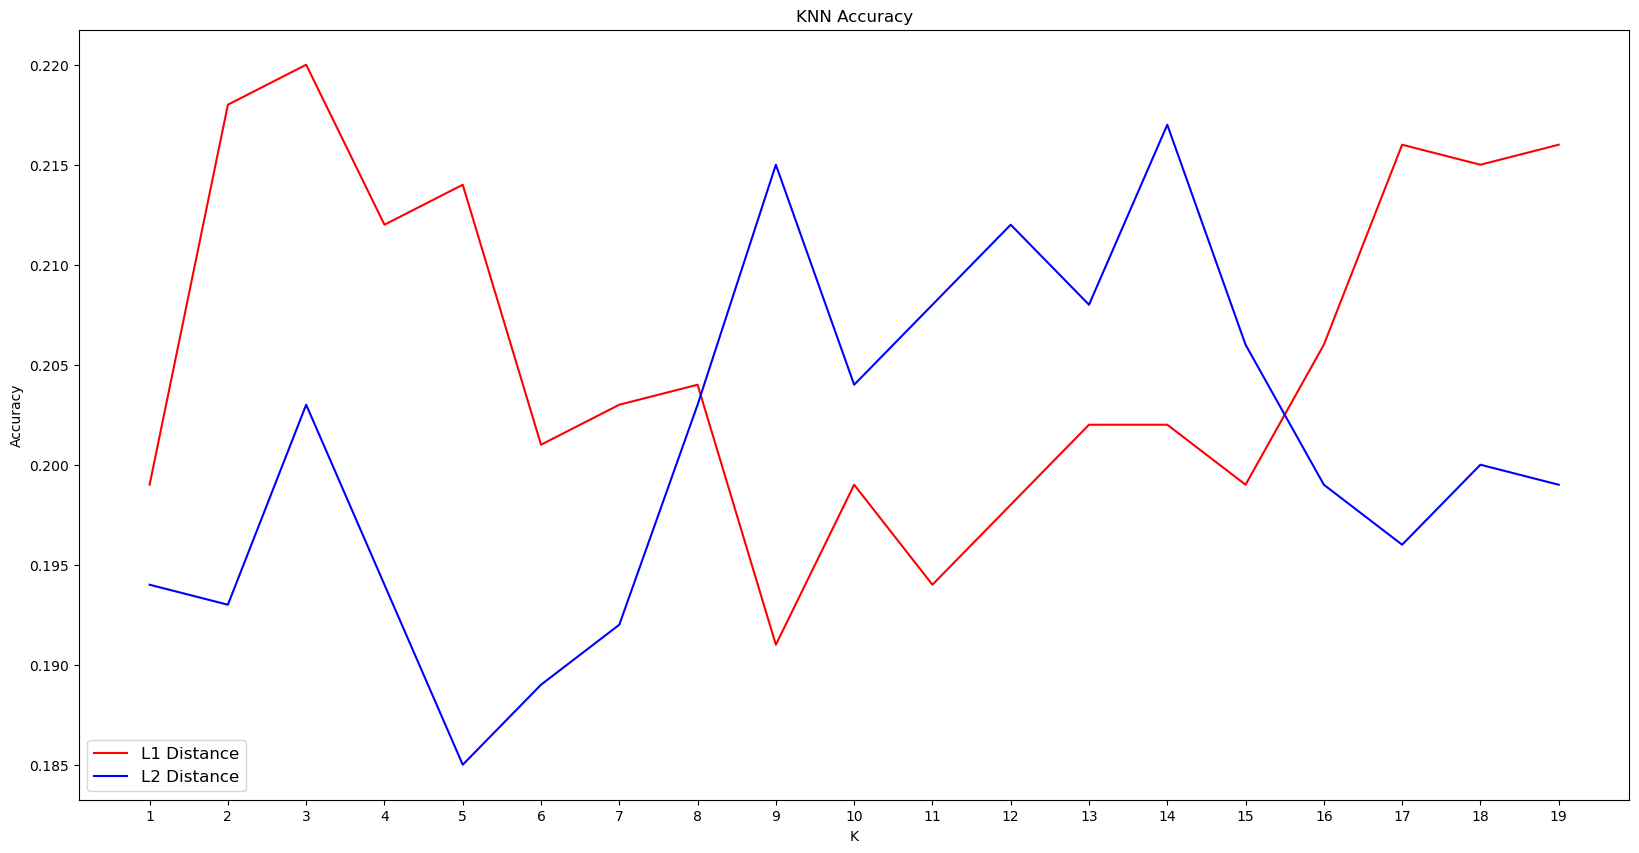

In [18]:
plt.figure(figsize=(20,10))
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_accuracies.values()), label="L1 Distance", color="red")
plt.plot(k_neighbors, list(l2_accuracies.values()), label="L2 Distance", color="blue")
plt.xticks(k_neighbors)
plt.legend([
    "L1 Distance",
    "L2 Distance"
], loc="lower left", fontsize=12)
plt.show()

In [19]:
def best_accuracy(accuracies):
    best_k = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_k]
    return best_k, best_accuracy

best_k_l1, best_accuracy_l1 = best_accuracy(l1_accuracies)
best_k_l2, best_accuracy_l2 = best_accuracy(l2_accuracies)

print(f"Best K for L1 Distance is {best_k_l1} with accuracy {best_accuracy_l1}")

Best K for L1 Distance is 3 with accuracy 0.22


# Final Verdict

Best K for L1 distance is 3 with accuracy of 0.22